In [1]:
# @InProceedings{maas-EtAl:2011:ACL-HLT2011,
#   author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
#   title     = {Learning Word Vectors for Sentiment Analysis},
#   booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},
#   month     = {June},
#   year      = {2011},
#   address   = {Portland, Oregon, USA},
#   publisher = {Association for Computational Linguistics},
#   pages     = {142--150},
#   url       = {http://www.aclweb.org/anthology/P11-1015}
# }

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron 
from sklearn import metrics 
import numpy as np
import os 
import re 

## Part 1 
I use the bag of words that are included in the daset to test Naive Bayes and Perceptron algorithms 

In [3]:
def load_files(files):
    return load_svmlight_files(files, n_features = None, dtype = None)

In [4]:
# Calculating Tf-Idf fot traing and testing , Tf-Idf -> Term frequency - Inverce document frequency

def tfidf(x_train, x_test):
    tf_transformer = TfidfTransformer()

    #  It computes the TF for each review, the IDF using each review, and finally the TF-IDF for each review
    x_train_tfidf = tf_transformer.fit_transform(x_train)
    #print(training_data_tfidf.shape)

    # .transform on the testing data which computes the TF for each review, 
    # then the TF-IDF for each review using the IDF from the training data 
    x_test_tfidf = tf_transformer.transform(x_test)
    #print(testing_data_tfidf.shape)

    return [x_train_tfidf, x_test_tfidf]

In [5]:
# Binerize target data, coverting target data into binary

def binerize(target):
    binerize_target = []
    for i in range (len(target)):
        if target[i] > 6:
            binerize_target.append(1) # positive comment
        else: 
            binerize_target.append(0) # negative comment
    return binerize_target

In [6]:
# Train and Test with the classifier (clf)
def classifie(clf,  x_train, y_train, x_test, y_test):

    y_train = binerize(y_train)
    y_test = binerize(y_test)

    clf.fit(x_train, y_train)
    accuracy = clf.score(x_test, y_test) *100
    
    confusion_matrix = metrics.confusion_matrix(y_test, clf.predict(x_test) )
    
    return [round(accuracy,2), confusion_matrix]

In [7]:
        
files = ["data/aclImdb/train/labeledBow.feat","data/aclImdb/test/labeledBow.feat"]

# Load data for training_data, training_target and testing_data, testing_target 
x_train, y_train, x_test, y_test = load_files(files)

# Count tf-idf for training and testing data
tfidf_data = tfidf(x_train, x_test)

x_train = tfidf_data[0]
x_test = tfidf_data[1]

result = classifie(MultinomialNB(), x_train, y_train, x_test, y_test)
print("Naive Bayes Accuracy = ", result[0])
print("\n",result[1])

result = classifie(Perceptron(), x_train, y_train, x_test, y_test)
print("\nPerceptron Accuracy = ", result[0])
print("\n",result[1])

#cm = result[1] 

Naive Bayes Accuracy =  83.04

 [[11125  1375]
 [ 2864  9636]]

Perceptron Accuracy =  84.92

 [[10944  1556]
 [ 2213 10287]]


# Part 2 
I create my own bag of words using the .txt files included in the dataset, then i test Naive Bayes and Perceptron algorithms

In [8]:
# Read the input line from the input path 
def load_input(path):
    result = []
    files = os.listdir(path)
    for f in files:
        for line in open(f"{path}/{f}", 'r',  encoding='utf-8'):
            result.append(line.strip())
    
    
    return result


x_train = []
x_train += load_input('data/aclImdb/train/pos')
x_train += load_input('data/aclImdb/train/neg')

x_test = []
x_test += load_input('data/aclImdb/test/pos')
x_test += load_input('data/aclImdb/test/neg')

In [9]:
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

# Preprocess deleting special characters numbers and punctuations 
def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

x_train = preprocess_reviews(x_train)
x_test = preprocess_reviews(x_test)

In [10]:
# Trasforming text 
#cv = CountVectorize(binary = True)
vectorizer = TfidfVectorizer(binary = True, 
                            analyzer = 'word', 
                            max_df = 0.9, 
                            ngram_range= (1,2))
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [11]:
# Train and test have same target (label)
target = [1 if i < 12500 else 0 for i in range(25000)]

model1 = MultinomialNB()
model1.fit(X_train, target)
accuracy = accuracy_score(target, model1.predict(X_test))
print ("Naive Bayes Accuracy:", accuracy*100)
c1 = metrics.confusion_matrix(target, model1.predict(X_test))
print("\n",c1)

model2 = Perceptron()
model2.fit(X_train, target)
accuracy = accuracy_score(target, model2.predict(X_test))
c2 = metrics.confusion_matrix(target, model2.predict(X_test))
print ("\nPerceptron Accuracy:", accuracy*100)
print("\n", c2)


Naive Bayes Accuracy: 87.58

 [[11432  1068]
 [ 2037 10463]]

Perceptron Accuracy: 88.69200000000001

 [[11028  1472]
 [ 1355 11145]]


## Plot Confusion Matrix

Text(0.5, 0, 'Predicted label')

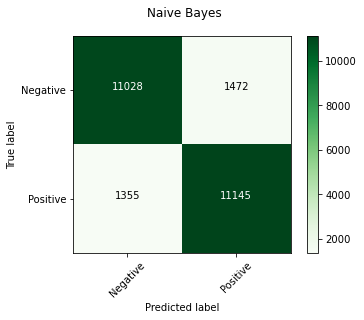

In [12]:
import matplotlib.pyplot as plt 
import itertools 
labels = ['Negative', 'Positive']

cm = c2 #change the cunfusion matrix (cf) to plot other models 
cmap = plt.cm.Greens
cm.astype('int64')

plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
plt.title = ('Confuzion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation = 45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j]),
             horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")


plt.suptitle('Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.savefig('grafici/e2_Perceptron')
